In [2]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from bs4 import BeautifulSoup
import re

In [3]:
import psycopg2
import json

In [4]:
from ui_db import DBConnection
DB = DBConnection()
DB.connect()
df = pd.DataFrame(json.loads(DB.getArticles()))

In [5]:
import re


def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    clean_text = soup.get_text()

    # Remove additional unwanted characters or spaces
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()

    return clean_text


# Preprocessing function
def preprocess_text(text):
    text = remove_html_tags(text)
    stop_words = set(stopwords.words('dutch'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha() and token not in stop_words]
    return " ".join(tokens)


In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pimvandenbosch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pimvandenbosch/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pimvandenbosch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Preprocess the news article titles and summaries
df['preprocessed'] = df['Title'].apply(preprocess_text) + " " + df['Summary'].apply(lambda x: preprocess_text(str(x)))

/var/folders/0v/w8c69m6s5f1bg9sd70tmvz4w0000gn/T/ipykernel_6315/103039943.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [8]:
# Convert the preprocessed text into numerical vectors using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['preprocessed'])

# Optional: Apply dimensionality reduction using SVD
svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X_tfidf)

In [9]:
# Apply DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
clusters = dbscan.fit_predict(X_reduced)

In [10]:
# Assign the cluster labels to the original DataFrame
df['cluster'] = clusters

In [16]:
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_colwidth', None) # Display full column content without truncation

# Print the clustered news articles
for cluster_id in np.unique(clusters):
    if cluster_id == -1:
        continue
    print(f"Cluster {cluster_id}:")
    #print(df[df['cluster'] == cluster_id][['Title', 'Summary']])
    print(df[df['cluster'] == cluster_id]['preprocessed'])
    
    print("\n")

Cluster 0:
4                                                                                                                       krawatencross lille mist thuisrijders wout aert sanne cant maar moment optie plek kalender wijzigen fem empel laurens sweeck boven krawatencross lille publiektrekkers wout aert sanne cant werden duidelijk gemist de lilse bergen ontbraken jaar extra beetje ambiance afwezigheid thuisrijders we missen twee sterke pionnen volk lokken
458                                                                                                                                                                                                   voorbeschouwing pakt wout aert hel noorden eerste kassei de ronde vlaanderen zit net we blikken alweer vooruit volgende monument zondag staat programma wout aert mathieu poel mogen blij rondewinnaar tadej pogacar pakt wout aert hel noorden eerste kassei
459                                                                                  

In [12]:
df

,URL,Title,Summary,Published,Image,RSS_URL,Topic,preprocessed,cluster
0,https://www.nieuwsblad.be/cnt/dmf20230316_98554131,Australiër verbreekt record van langste surfsessie,"<p>De Australiër Blake Johnston (40) heeft vrijdagochtend het record van langste surfsessie verbroken. Dat deed hij aan het strand van Cronulla, ten zuiden van Sydney.</p>","Fri, 17 Mar 2023 00:32:24 +0100",https://static.nieuwsblad.be/Assets/Images_Upload/2023/03/16/0979646b-34e9-4528-9327-3eda8b26778c.jpg,https://www.nieuwsblad.be/rss/section/ac190504-1b98-4241-99ff-e512d837457e,Sport,australiër verbreekt record langste surfsessie de australiër blake johnston vrijdagochtend record langste surfsessie verbroken dat deed strand cronulla ten zuiden sydney,-1
1,https://www.nieuwsblad.be/cnt/dmf20230312_95016111,Lag het groeiende succes moeilijk? Hoe Nederlandse beslissing Belgisch shorttrack-succes in gevaar brengt: “Heel verdrietig”,"<p>Dat Stijn Desmet met zilver op de 1.000 meter zijn beste WK-resultaat ooit haalde, de mixed relay een finale afdwong en de hele wintercampagne een succes was: het moest allemaal wijken voor de boodschap dat Nederland zijn samenwerking met de Belgische shorttrackers wil herzien. “Ik ben heel verdrietig”, laat Desmet weten.</p>","Sun, 12 Mar 2023 14:55:39 +0100",https://static.nieuwsblad.be/Assets/Images_Upload/2023/03/12/99e1b9c3-59e7-4d0f-be49-53cf8ced71aa.jpg,https://www.nieuwsblad.be/rss/section/ac190504-1b98-4241-99ff-e512d837457e,Sport,lag groeiende succes moeilijk hoe nederlandse beslissing belgisch gevaar brengt heel verdrietig dat stijn desmet zilver meter beste ooit haalde mixed relay finale afdwong hele wintercampagne succes moest allemaal wijken boodschap nederland samenwerking belgische shorttrackers herzien ik heel verdrietig laat desmet weten,-1
2,https://www.nieuwsblad.be/cnt/dmf20230305_95531118,Goed nieuws: Tibo Vyvey is terug na hersentrombose,"<p><span class="" kleur"">Dit weekeinde opende de Koninklijke Roeivereniging Brugge het internationaal roeiseizoen met haar 28ste editie van de Brugge Boat Race. 685 roeiers en roeisters uit negen landen kwamen in 159 boten het Brugse Waggelwater op voor een chronorace over 5 km. </span>Tibo Vyvey de talentvolle belofte van de organiserende club ontpopte zich met een vlotte skiffzege top opvallende uitblinker van het weekeinde.</p>","Sun, 05 Mar 2023 15:09:00 +0100",https://static.nieuwsblad.be/Assets/Images_Upload/2023/03/03/fe23c285-a9b9-4801-b0d6-fd48de650ee5.jpg,https://www.nieuwsblad.be/rss/section/ac190504-1b98-4241-99ff-e512d837457e,Sport,goed nieuws tibo vyvey terug hersentrombose dit weekeinde opende koninklijke roeivereniging brugge internationaal roeiseizoen editie brugge boat race roeiers roeisters negen landen kwamen boten brugse waggelwater chronorace km tibo vyvey talentvolle belofte organiserende club ontpopte vlotte skiffzege top opvallende uitblinker weekeinde,18
3,https://www.nieuwsblad.be/cnt/dmf20230223_95253094,"Sid (13) kan de mat amper zien, maar kroont zich wel tot Belgisch judokampioen: “Het perfecte voorbeeld van inclusie”","<p>Sid Mathues (13) uit Budingen bij Zoutleeuw is zopas Belgisch kampioen judo bij de U15 (-55 kilogram) geworden. Dat is op zich al een hele prestatie, maar het wordt al helemaal uitzonderlijk als je weet dat Sid wettelijk blind is. “Dit is het perfecte voorbeeld van inclusie”, zegt een trotse mama, Barbara Morani.</p>","Thu, 23 Feb 2023 15:35:04 +0100",https://static.nieuwsblad.be/Assets/Images_Upload/2023/02/23/ec89b124-8bca-465b-b9b3-2441573c3aa1.jpg,https://www.nieuwsblad.be/rss/section/ac190504-1b98-4241-99ff-e512d837457e,Sport,sid mat amper zien kroont wel belgisch judokampioen het perfecte voorbeeld inclusie sid mathues budingen zoutleeuw zopas belgisch kampioen judo kilogram geworden dat hele prestatie helemaal uitzonderlijk weet sid wettelijk blind dit perfecte voorbeeld inclusie zegt trotse mama barbara morani,-1
4,https://www.nieuwsblad.be/cnt/dmf20230212_96893518,Krawatencross in Lille mist thuisrijders Wout

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [19]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_reduced)

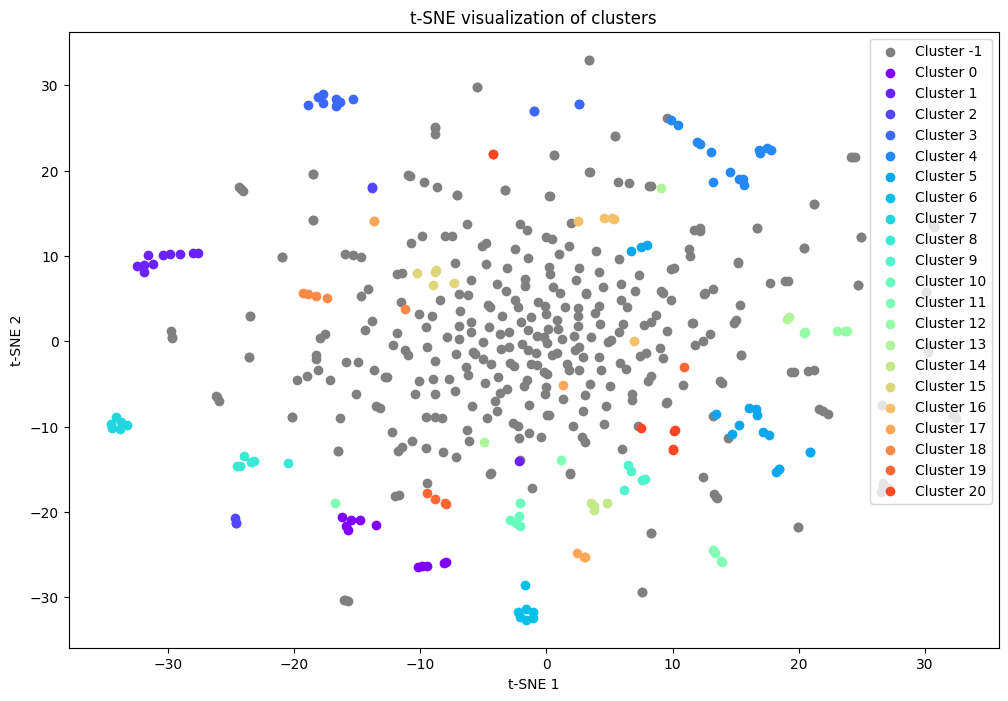

In [20]:
plt.figure(figsize=(12, 8))
for cluster_id in np.unique(clusters):
    if cluster_id == -1:
        color = 'gray'
    else:
        color = plt.cm.rainbow(cluster_id / len(np.unique(clusters)))
    plt.scatter(X_tsne[clusters == cluster_id, 0], X_tsne[clusters == cluster_id, 1], c=[color], label=f"Cluster {cluster_id}")
plt.legend()
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE visualization of clusters')
plt.show()


In [21]:
import plotly.graph_objs as go
import plotly.express as px

In [25]:
def split_text(text, max_length=50):
    words = text.split()
    lines = []
    current_line = []

    for word in words:
        if len(' '.join(current_line + [word])) <= max_length:
            current_line.append(word)
        else:
            lines.append(' '.join(current_line))
            current_line = [word]

    if current_line:
        lines.append(' '.join(current_line))

    return '<br>'.join(lines)

In [23]:
# Create a DataFrame with t-SNE data and cluster labels

tsne_df = pd.DataFrame(X_tsne, columns=['t-SNE 1', 't-SNE 2'])
tsne_df['Cluster'] = clusters
tsne_df['Preprocessed'] = df['preprocessed'].apply(split_text)


# Create an interactive scatter plot
fig = px.scatter(tsne_df,
                 x='t-SNE 1',
                 y='t-SNE 2',
                 color='Cluster',
                 hover_data=['Preprocessed'],
                 color_continuous_scale=px.colors.sequential.Rainbow,
                 title='t-SNE visualization of clusters')

# Show the plot
fig.show()